
# EMBARCATECH

**Atividade "Aprendizagem de Máquina – Parte 2".**

**Grupo:** Camila Queiroz Boa Morte Pereira; Davi Oliveira Santana; Carvalho Hilquias Rodrigues de Oliveira; Mateus Fernandes Santos; Ronaldo Ruiz Filho.


DATA: 28/11/2025

DATASET: mnist

In [29]:
# ----------------------------
# CARREGAR BIBLIOTECAS
# ----------------------------

# Em geral, o Colab já vem com TF, então essa linha pode ser comentada.
# !pip install -q tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

print("Versão do Tensorflow:")
print(tf.__version__)

Versão do Tensorflow:
2.19.0


In [30]:
# ----------------------------
# CARREGAR O DATASET MNIST
# ----------------------------

# Carregar MNIST diretamente do Keras.
# Este é um conjunto de dados com 60.000 imagens em tons de cinza de 28x28 pixels dos 10 dígitos,
# juntamente com um conjunto de teste de 10.000 imagens.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar as imagens para o intervalo 0–1.
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Redimensionar para CNN (altura, largura, canais)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Imprimir os formatos (shapes) dos dados carregados:
print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape,  y_test.shape)

Train: (60000, 28, 28, 1) (60000,)
Test : (10000, 28, 28, 1) (10000,)


In [31]:
# ----------------------------
# Definindo CNN e suas camadas
# ----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

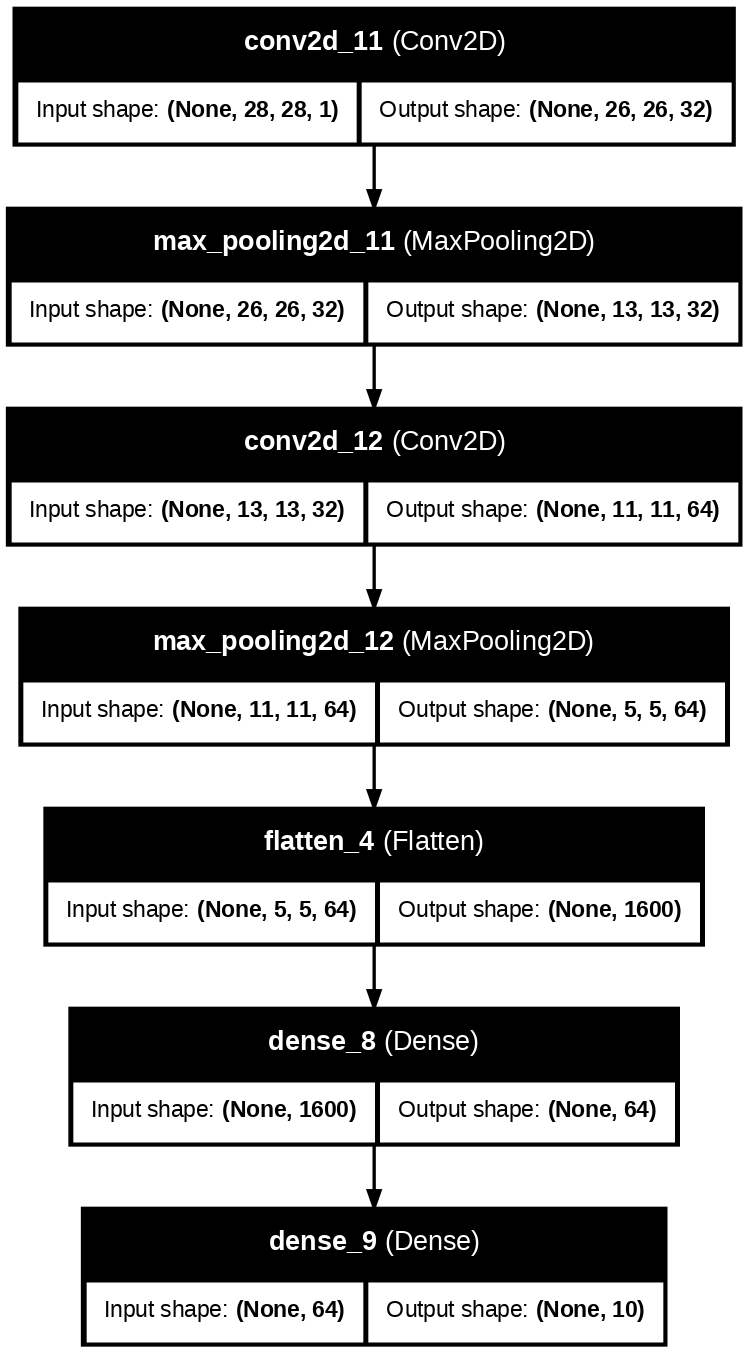

In [32]:
# ----------------------------
# PLOTAR MODELO
# ----------------------------
from IPython.display import Image
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="modelo_cnn_fluxograma.png",   # salva a imagem
    show_shapes=True,                      # mostra shapes dos tensores
    show_layer_names=True,                 # mostra nomes das camadas
    dpi=120                                # melhora a resolução
)
Image(filename="modelo_cnn_fluxograma.png")

In [33]:
# ----------------------------
# TREINAR A CNN
# ----------------------------

# Configuração dos hiperparâmetros de treinamento do modelo.
# Aqui definimos:
#  - otimizador: Adam com taxa de aprendizado (learning rate) = 1e-3
#  - função de perda: sparse_categorical_crossentropy, pois os rótulos são inteiros (0–9)
#  - métricas: accuracy (acurácia de classificação)
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Número de épocas (ciclos completos sobre o dataset de treino).
# Quanto maior, melhor a precisão — mas também aumenta o tempo de treinamento.
EPOCHS = 20

# Processo de treinamento da Rede Neural Convolucional.
# model.fit recebe:
#  - x_train e y_train: dataset de treino
#  - epochs: número de vezes que o modelo verá todo o conjunto de treino
#  - validation_split: Reservamos 10% dos dados para validação automática
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8934 - loss: 0.3520 - val_accuracy: 0.9830 - val_loss: 0.0561
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0546 - val_accuracy: 0.9865 - val_loss: 0.0464
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9890 - loss: 0.0350 - val_accuracy: 0.9893 - val_loss: 0.0383
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9892 - val_loss: 0.0352
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0171 - val_accuracy: 0.9888 - val_loss: 0.0407
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9951 - loss: 0.0139 - val_accuracy: 0.9897 - val_loss: 0.0415
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0096 - val_accuracy: 0.9908 - val_loss: 0.0421
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9976 - loss: 0.0081 -

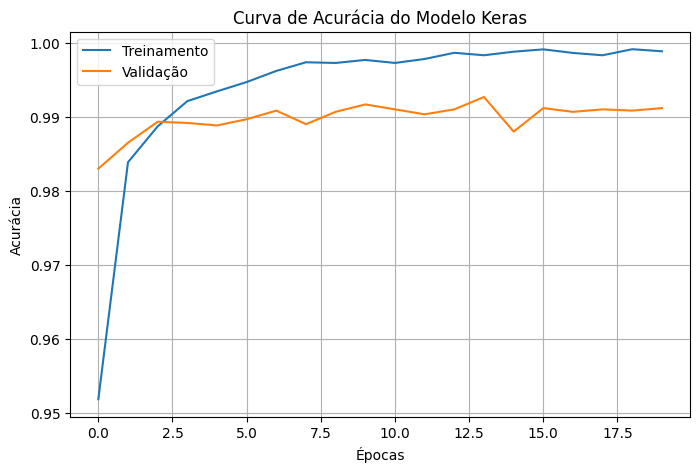

In [34]:
# ----------------------------
# ACURÁCIA DO TREINAMENTO
# ----------------------------

plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Treinamento")
plt.plot(history.history["val_accuracy"], label="Validação")
plt.title("Curva de Acurácia do Modelo Keras")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()

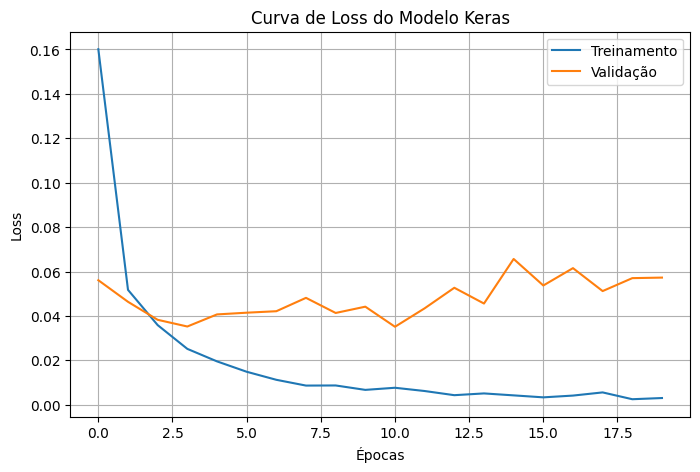

In [35]:
# ----------------------------
# LOSS DO TREINAMENTO
# ----------------------------

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Treinamento")
plt.plot(history.history["val_loss"], label="Validação")
plt.title("Curva de Loss do Modelo Keras")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


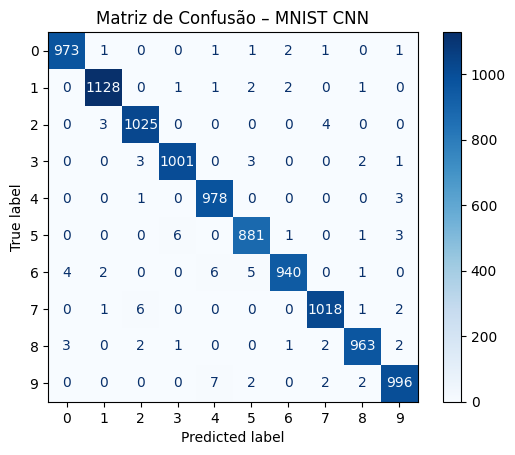

In [36]:
# -------------------------------------
# MATRIZ DE CONFUSÃO
# ------------------------------------

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Prever com o modelo treinado
y_pred = model.predict(x_test)

# Converter probabilidades em classes (0–9)
y_pred_classes = np.argmax(y_pred, axis=1)

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)

# Exibir matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão – MNIST CNN")
plt.show()

In [37]:
# ----------------------------
# ACURÁCIA DO MODELO
# ----------------------------

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"📌 Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")
print(f"📌 Função custo no conjunto de teste:     {test_loss:.4f}")

📌 Acurácia no conjunto de teste: 99.03%
📌 Função custo no conjunto de teste:     0.0495


In [38]:
# ----------------------------
# SALVAR O MODELO ORIGINAL
# ----------------------------

# 1) Salvar modelo original em formato Keras (.keras)
model_keras_path = "original_model.keras"
model.save(model_keras_path)
print("Modelo Keras salvo em:", model_keras_path)

# 2) Exportar SavedModel para uso com TFLite / TF Serving
saved_model_dir = "cnn_mnist_savedmodel"

# Se já existir, apagar para evitar conflitos
if os.path.exists(saved_model_dir):
    shutil.rmtree(saved_model_dir)

model.export(saved_model_dir)
print("SavedModel exportado em:", saved_model_dir)

Modelo Keras salvo em: original_model.keras
Saved artifact at 'cnn_mnist_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_41')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136765045028432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057176912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057175568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057176144: TensorSpec(shape=(), dtype=tf.resource, name=None)
SavedModel exportado em: cnn_mnist_savedmodel


In [39]:
# ----------------------------
# CONVERTER PARA O TFLITE (FLOAT32)
# ----------------------------

# Define o nome do arquivo TFLite de saída
tflite_float_path = "cnn_mnist_float32.tflite"

# Cria um conversor TFLite a partir de um modelo Keras
converter_float = tf.lite.TFLiteConverter.from_keras_model(model)

# Não quantiza (continua float32), mas faz otimizações internas no grafo
converter_float.optimizations = [tf.lite.Optimize.DEFAULT]

# Converte o modelo para TFLite
tflite_model_float = converter_float.convert()

# Salva o arquivo .tflite no disco
with open(tflite_float_path, "wb") as f:
    f.write(tflite_model_float)

print("Modelo TFLite float32 salvo em:", tflite_float_path)

Saved artifact at '/tmp/tmp4htbxp9b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_41')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136765045028432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057176912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057175568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057176144: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modelo TFLite float32 salvo em: cnn_mnist_float32.tflite


In [40]:
# ----------------------------
# CONVERTER PARA O TFLITE INT8 (TinyML)
# ----------------------------

# Define o nome do arquivo de saída
tflite_int8_path = "cnn_mnist_int8.tflite"

# Função fornece amostras reais do dataset não normalizadas para o conversor TFLite.
def representative_data_gen():
    # usar, por exemplo, 500 imagens para calibrar
    for i in range(500):
        img = x_train[i]
        img = np.expand_dims(img, axis=0).astype(np.float32)
        yield [img]


# Ela é usada para:
# - calibrar faixas de quantização
# - achar valores mínimos/máximos de ativação
# - ajustar pesos e tensores para int8
# - Se não fizer isso, a quantização não funciona corretamente.

# Criação do conversor TFLite - Converte o modelo Keras já carregado na RAM.
converter_int8 = tf.lite.TFLiteConverter.from_keras_model(model)

# Ativa a quantização e otimização
converter_int8.optimizations = [tf.lite.Optimize.DEFAULT]

# Informa ao conversor o dataset representativo
converter_int8.representative_dataset = representative_data_gen

# Quantização total INT8 (pesos + ativação + IO)
converter_int8.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter_int8.inference_input_type = tf.int8
converter_int8.inference_output_type = tf.int8

# Converte o modelo
tflite_model_int8 = converter_int8.convert()

# Salva o arquivo
with open(tflite_int8_path, "wb") as f:
    f.write(tflite_model_int8)

print("Modelo TFLite INT8 salvo em:", tflite_int8_path)

Saved artifact at '/tmp/tmp3t456iew'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_41')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136765045028432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057176912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057175568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057177104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136765057176144: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Modelo TFLite INT8 salvo em: cnn_mnist_int8.tflite


In [41]:
# ----------------------------
# COMPARAR TAMANHOS DOS MODELOS
# ----------------------------

def folder_size(path):
    total = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total += os.path.getsize(fp)
    return total

size_keras      = os.path.getsize("original_model.keras")          / 1024 / 1024
size_tfl_float  = os.path.getsize(tflite_float_path)               / 1024 / 1024
size_tfl_int8   = os.path.getsize(tflite_int8_path)                / 1024 / 1024
size_savedmodel = folder_size(saved_model_dir)                     / 1024 / 1024

print(f"Modelo Keras (.keras):        {size_keras:.2f} MB")
print(f"SavedModel (pasta):           {size_savedmodel:.2f} MB")
print(f"TFLite float32:               {size_tfl_float:.2f} MB")
print(f"TFLite INT8 (quantização):    {size_tfl_int8:.2f} MB")

print("\nRedução TFLite float32 vs Keras:  {:.1f}%".format(
    100 * (1 - size_tfl_float / size_keras)
))
print("Redução TFLite INT8 vs Keras:      {:.1f}%".format(
    100 * (1 - size_tfl_int8 / size_keras)
))

Modelo Keras (.keras):        1.43 MB
SavedModel (pasta):           0.99 MB
TFLite float32:               0.12 MB
TFLite INT8 (quantização):    0.12 MB

Redução TFLite float32 vs Keras:  91.3%
Redução TFLite INT8 vs Keras:      91.3%


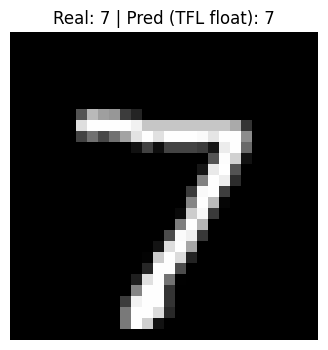

Probabilidades (float32): [1.8130037e-17 2.5914858e-13 2.6309834e-15 3.3046860e-18 4.2623532e-15
 3.0326297e-19 6.3972766e-24 1.0000000e+00 2.2214027e-20 4.0138520e-15]


In [43]:
# ----------------------------
# INFERÊNCIA COM O TFLite FLOAT32
# ----------------------------

# Carregar modelo TFLite float32
interpreter_float = tf.lite.Interpreter(model_path=tflite_float_path)
interpreter_float.allocate_tensors()

input_details_f = interpreter_float.get_input_details()
output_details_f = interpreter_float.get_output_details()

idx = 0

img = x_test[idx]               # deve estar normalizada (0~1)
true_label = int(y_test[idx])   # CORREÇÃO AQUÍ

# Garantir que tem canal
if img.ndim == 2:
    img = np.expand_dims(img, axis=-1)

# Preparar entrada
input_data = np.expand_dims(img, axis=0).astype(np.float32)

interpreter_float.set_tensor(input_details_f[0]["index"], input_data)
interpreter_float.invoke()

output_data = interpreter_float.get_tensor(output_details_f[0]["index"])
pred_class = int(np.argmax(output_data))

# Plot
plt.figure(figsize=(4,4))
plt.imshow(img[:,:,0], cmap="gray")   # CORREÇÃO
plt.title(f"Real: {true_label} | Pred (TFL float): {pred_class}")
plt.axis("off")
plt.show()

print("Probabilidades (float32):", output_data[0])

INPUT (int8): [{'name': 'serving_default_keras_tensor_41:0', 'index': 0, 'shape': array([ 1, 28, 28,  1], dtype=int32), 'shape_signature': array([-1, 28, 28,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.003921568859368563, -128), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
OUTPUT (int8): [{'name': 'StatefulPartitionedCall_1:0', 'index': 17, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


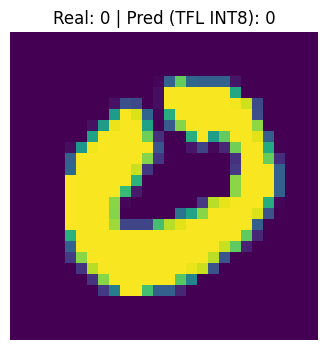

Logits dequantizados (INT8): [0.99609375 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [49]:
# ----------------------------
# INFERÊNCIA COM O TFLite INT8
# ----------------------------

# Carregar modelo TFLite INT8
interpreter_int8 = tf.lite.Interpreter(model_path=tflite_int8_path)
interpreter_int8.allocate_tensors()

input_details_i = interpreter_int8.get_input_details()
output_details_i = interpreter_int8.get_output_details()

print("INPUT (int8):", input_details_i)
print("OUTPUT (int8):", output_details_i)

# Mesma imagem de teste
idx = 25  # use o mesmo índice que antes se quiser comparar
img = x_test[idx]
true_label = int(y_test[idx])

# Preparar entrada: quantizar a imagem [0,1] para int8
input_scale, input_zero_point = input_details_i[0]["quantization"]

img_float = np.expand_dims(img, axis=0).astype(np.float32)
input_data_int8 = img_float / input_scale + input_zero_point
input_data_int8 = np.clip(input_data_int8, -128, 127).astype(np.int8)

interpreter_int8.set_tensor(input_details_i[0]["index"], input_data_int8)
interpreter_int8.invoke()
output_data_int8 = interpreter_int8.get_tensor(output_details_i[0]["index"])

# Saída também é int8 – desquantizar para obter probabilidades aproximadas
output_scale, output_zero_point = output_details_i[0]["quantization"]
logits_dequant = (output_data_int8.astype(np.float32) - output_zero_point) * output_scale

pred_idx_int8 = int(np.argmax(logits_dequant[0]))
pred_class_int8 = pred_idx_int8

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title(f"Real: {true_label} | Pred (TFL INT8): {pred_class_int8}")
plt.axis("off")
plt.show()

print("Logits dequantizados (INT8):", logits_dequant[0])

In [51]:
# ----------------------------
# ACURÁCIA DO MODELO - TFLITE
# ----------------------------

# Escolha qual modelo TFLite avaliar
# TFLITE_MODEL_PATH = tflite_int8_path
TFLITE_MODEL_PATH = tflite_float_path

# Carregar modelo TFLite
interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_PATH)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

correct = 0
total = len(x_test)

print("Calculando acurácia no modelo TFLite...")

for i in range(total):
    img = x_test[i]
    label = int(y_test[i])

    # Preparar a imagem no formato esperado (float32 ou int8)
    input_tensor = np.expand_dims(img, axis=0).astype(input_details[0]["dtype"])

    # Ajuste especial se for modelo INT8 (quantizado)
    if input_details[0]["dtype"] != np.float32:
        scale, zero_point = input_details[0]["quantization"]
        input_tensor = img.astype(np.float32)
        input_tensor = np.expand_dims(input_tensor, axis=0)
        input_tensor = input_tensor / scale + zero_point
        input_tensor = np.clip(input_tensor, -128, 127).astype(np.int8)

    # Inferência
    interpreter.set_tensor(input_details[0]["index"], input_tensor)
    interpreter.invoke()

    output = interpreter.get_tensor(output_details[0]["index"])[0]

    # Desquantizar saída do modelo INT8
    if output_details[0]["dtype"] != np.float32:
        out_scale, out_zero_point = output_details[0]["quantization"]
        output = (output.astype(np.float32) - out_zero_point) * out_scale

    pred = np.argmax(output)

    if pred == label:
        correct += 1

accuracy = correct / total

print(f"📌 Acurácia no TFLite ({TFLITE_MODEL_PATH}): {accuracy * 100:.2f}%")

Calculando acurácia no modelo TFLite...
📌 Acurácia no TFLite (cnn_mnist_float32.tflite): 99.01%


In [52]:
# ----------------------------
# BAIXAR O TFLITE PARA SUA MÁQUINA, DIRETO DO COLAB
# ----------------------------

from google.colab import files
files.download(TFLITE_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>